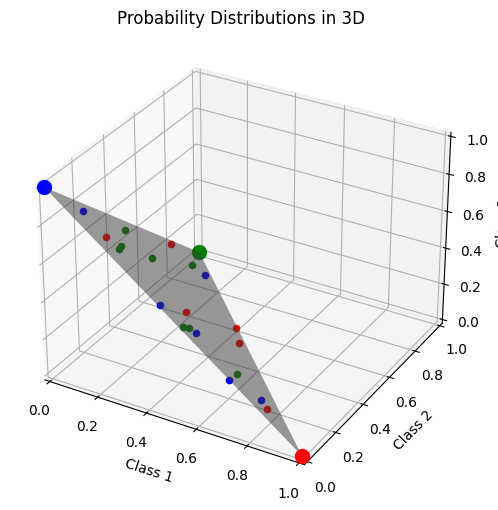

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

# Function to generate random probability distributions of dimension 3
def generate_probabilities(num_distributions):
    return np.random.dirichlet(np.ones(3), size=num_distributions)

# Generate hypothetical probability distributions from classifiers
num_distributions = 20
probability_distributions = generate_probabilities(num_distributions)

# Define the vertices of the 3D triangle
triangle_vertices = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Create figure and 3D axes
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the triangle surface
verts = [triangle_vertices]
triangle = ax.plot_trisurf(triangle_vertices[:, 0], triangle_vertices[:, 1], triangle_vertices[:, 2],
                           triangles=[[0, 1, 2]], color='gray', alpha=0.5)

# Define colors for each class
colors = ['r', 'g', 'b']

# Plot the points obtained from the hypothetical classifier
for i in range(3):
    ax.scatter(triangle_vertices[i, 0], triangle_vertices[i, 1], triangle_vertices[i, 2], c=colors[i], marker='o', s=100, label='Class {}'.format(i+1))
for i in range(len(probability_distributions)):
    class_points = probability_distributions[i]
    ax.scatter(class_points[0], class_points[1],class_points[2],c=random.choice(colors))

# Set labels and title
ax.set_xlabel('Class 1')
ax.set_ylabel('Class 2')
ax.set_zlabel('Class 3')
ax.set_title('Probability Distributions in 3D')

# Set limits for axes
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# Show the plot
plt.show()


Explaination of the plot above :

Triangle Surface: The gray-shaded triangle represents a 3D space. Each corner of the triangle corresponds to one of the three classes. For instance, the first corner (1, 0, 0) represents class 1, the second corner (0, 1, 0) represents class 2, and the third corner (0, 0, 1) represents class 3. These corners are the one-hot encoded representations of the classes.

Points Scatter Plots: The colored points scattered on the triangle represent probability distributions obtained from a hypothetical classifier. Each point's position in the triangle indicates the predicted probabilities for each class. The x-coordinate of a point represents the predicted probability for class 1, the y-coordinate represents the predicted probability for class 2, and the z-coordinate represents the predicted probability for class 3.

Point Colors: The colors of the points correspond to the true classes. For example, if a point is red, it means that the true class is class 1. Similarly, green points represent class 2, and blue points represent class 3.

Interpretation: By looking at the plot, we can assess how well the classifier performs in terms of predicting the true classes. Points that are closer to the vertices of the triangle are more accurate predictions since they align better with the true classes. Points that are far from the vertices represent less accurate predictions, indicating a higher uncertainty in the classifier's output.

# The relation between KL divergence and cross entropy

### Explaination of Cross Entropy

In the context of classification, the true probability distribution \( P \) represents the actual distribution of class labels, while the predicted probability distribution \( Q \) represents the distribution of class labels predicted by a model.

Cross-Entropy measures the average number of bits needed to encode data from the true distribution \( P \) given the predicted distribution \( Q \). In other words, it quantifies how well the predicted distribution \( Q \) represents the true distribution \( P \).

When we minimize Cross-Entropy, we are essentially reducing the discrepancy between the true distribution \( P \) and the predicted distribution \( Q \). This means that the predicted probabilities become closer to the true probabilities, resulting in a more accurate representation of the true distribution.

Now, let's consider the term "minimizing the amount of information lost". In the context of information theory, entropy measures the uncertainty or randomness in a probability distribution. The lower the entropy, the less uncertain the distribution is.

When we minimize Cross-Entropy, we are effectively minimizing the amount of information lost when approximating \( P \) with \( Q \). This is because Cross-Entropy includes both the entropy of the true distribution \( P \) and the KL Divergence from \( P \) to \( Q \). By minimizing Cross-Entropy, we are minimizing the additional information loss caused by the discrepancy between \( P \) and \( Q \), thus making the approximation more accurate.

In summary, minimizing Cross-Entropy is equivalent to minimizing the amount of information lost when approximating \( P \) with \( Q \) because it measures the discrepancy between the true and predicted distributions and aims to reduce this discrepancy to improve the accuracy of the approximation.



### Explanation of KL Divergence

KL Divergence, also known as Kullback-Leibler divergence, is a measure of how one probability distribution diverges from a second, expected probability distribution. It quantifies the difference between two probability distributions \( P \) and \( Q \).

Mathematically, the KL divergence from probability distribution \( Q \) to probability distribution \( P \) is defined as:

$$ D_{KL}(P \| Q) = \sum_{i} P(i) \log\left(\frac{P(i)}{Q(i)}\right) $$

where \( i \) indexes the elements of the distributions.

**Interpretation**:

- If \( D_{KL}(P \| Q) = 0 \), it indicates that the two distributions \( P \) and \( Q \) are identical.
- If \( D_{KL}(P \| Q) > 0 \), it indicates that the distribution \( P \) diverges from distribution \( Q \).
- If \( D_{KL}(P \| Q) \) is large, it indicates that the difference between \( P \) and \( Q \) is significant.

**Relation to Cross-Entropy**:

KL Divergence is closely related to Cross-Entropy. In fact, the Cross-Entropy between two distributions \( P \) and \( Q \) can be expressed as the sum of the entropy of \( P \) and the KL divergence between \( P \) and \( Q \):

$$ H(P, Q) = -\sum_{i} P(i) \log(Q(i)) = H(P) + D_{KL}(P \| Q) $$

where \( H(P) \) denotes the entropy of distribution \( P \).

**In Classification**:

In the context of classification, KL divergence is often used to measure the dissimilarity between the predicted probability distribution \( Q \) and the true probability distribution \( P \) of class labels. Minimizing the KL divergence helps in improving the performance of classification models by making the predicted probabilities closer to the true probabilities.

**why they are the same as loss functions?**:

To explain how minimizing KL Divergence is equivalent to minimizing Cross-Entropy, let's start by understanding their relationship:

1. **KL Divergence (KL)**: Measures the difference between two probability distributions \( P \) and \( Q \). It quantifies how much information is lost when we use \( Q \) to approximate \( P \).

2. **Cross-Entropy (CE)**: Measures the average number of bits needed to encode data from one distribution given another distribution. In classification, it measures the discrepancy between the true probability distribution \( P \) and the predicted probability distribution \( Q \).

Now, let's consider the relationship between KL Divergence and Cross-Entropy. We know that Cross-Entropy can be expressed as the sum of two terms: the entropy of \( P \) and the KL Divergence from \( P \) to \( Q \):

$$ H(P, Q) = H(P) + D_{KL}(P \| Q) $$

Here, \( H(P) \) represents the entropy of \( P \), which is a constant with respect to \( Q \). Therefore, minimizing \( H(P, Q) \) is equivalent to minimizing \( D_{KL}(P \| Q) \).

In the context of classification, minimizing Cross-Entropy means reducing the discrepancy between the true distribution \( P \) and the predicted distribution \( Q \). By minimizing \( D_{KL}(P \| Q) \), we are also minimizing the amount of information lost when approximating \( P \) with \( Q \).






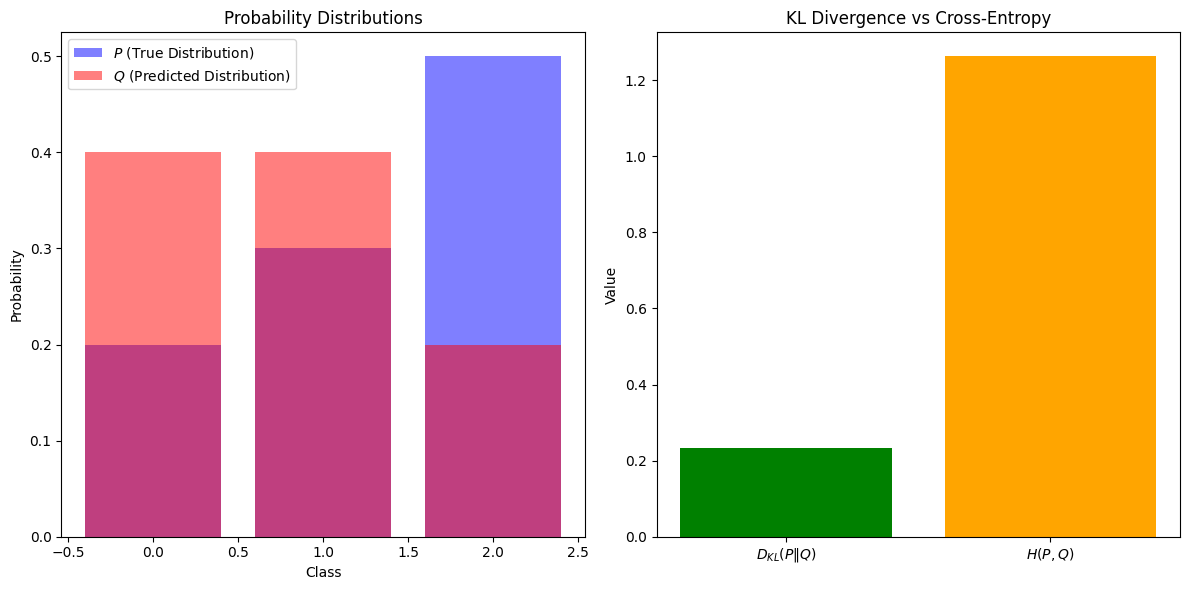

KL Divergence: 0.2332113080895542
Cross-Entropy: 1.2628643221541276


In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define two probability distributions P and Q
P = np.array([0.2, 0.3, 0.5])  # True distribution
Q = np.array([0.4, 0.4, 0.2])  # Predicted distribution

# Calculate KL divergence
KL_divergence = np.sum(P * np.log(P / Q))

# Calculate Cross-Entropy
cross_entropy = -np.sum(P * np.log(Q))

# Plot the probability distributions
plt.figure(figsize=(12, 6))

# Plotting the true and predicted distributions
plt.subplot(1, 2, 1)
plt.bar(np.arange(len(P)), P, color='blue', alpha=0.5, label='$P$ (True Distribution)')
plt.bar(np.arange(len(Q)), Q, color='red', alpha=0.5, label='$Q$ (Predicted Distribution)')
plt.xlabel('Class')
plt.ylabel('Probability')
plt.title('Probability Distributions')
plt.legend()

# Plotting the KL divergence and Cross-Entropy
plt.subplot(1, 2, 2)
plt.bar(['$D_{KL}(P \| Q)$', '$H(P, Q)$'], [KL_divergence, cross_entropy], color=['green', 'orange'])
plt.ylabel('Value')
plt.title('KL Divergence vs Cross-Entropy')

# Show the plot
plt.tight_layout()
plt.show()

print("KL Divergence:", KL_divergence)
print("Cross-Entropy:", cross_entropy)
